## Функции обработки спектров

In [41]:
# Расчёт дифференциальных сумм для соседних спектров почастотно 
def diffsums(sp_1, sp_2):
    diffsum = 0
    for i in range(len(sp_1)):           
        diffsum += abs(int(sp_2[i]) - int(sp_1[i]))
    return diffsum

# Расчёт дифференциальных сумм для соседних спектров по интервалам частот

# значения интенсивности в интервалах частот складываются
# диф. сумма зависит от изменения интегральных интенсивностей в интервалах

def diffsums_2(sp_1, sp_2, n):
    diffsums = []
    l = int(len(sp_1)*n)  # ширина интервала частот
    for i in range(0, len(sp_1) - l, l):
        band_sum_1, band_sum_2 = 0, 0
        for j in range(i, i+l):
            band_sum_1 += int(sp_1[j])
            band_sum_2 += int(sp_2[j])
        diffsums.append(abs(band_sum_2 - band_sum_1))
    return max(diffsums)

def diffsums_3(sp_1, sp_2, n, k):
    diffsums = []
    l = int(len(sp_1)*n)  # ширина интервала частот
    for i in range(0, len(sp_1) - l, l):
        band_sum_1, band_sum_2 = 0, 0
        for j in range(i, i+l):
            band_sum_1 += int(sp_1[j])
            band_sum_2 += int(sp_2[j])
        s = abs(band_sum_2 - band_sum_1)
        if s > k: diffsums.append(s)
    return sum(diffsums)

In [50]:
import time
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

t1 = time.time()

dt = 0.1   # задержка между спектрами в паре
n = 0.1    # относительная ширина интервалов частот
k = 15     # коэффициент отсечки по диф.сумме интервала частот

sample_rate, samples = wavfile.read('./test_audio/детекция изменений/307_mono.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dt_min = times[1]-times[0]
t = []
ds_1, ds_2, ds_3 = [], [], []
st = int(dt/dt_min)   # шаг по времени
for i in range(0, len(spectrogram[0])-st, st):
    sp_1, sp_2 = [], []
    for j in range(len(spectrogram)):
        sp_1.append(spectrogram[j][i])
        sp_2.append(spectrogram[j][i+st])
    t.append(round(i*dt_min))
    ds_1.append(diffsums(sp_1, sp_2)) 
    ds_2.append(diffsums_2(sp_1, sp_2, n)) 
    ds_3.append(diffsums_3(sp_1, sp_2, n, k))

t2 = time.time()

print(len(t), len(ds))
print('длительность аудиоролика, m-s:', str(t[-1]//60) + '-' + str(t[-1]%60))
print('длительность обработки, m-s:', str(round(t2 - t1)//60) + '-' + str(round((t2 - t1)%60, 2)))

722 722
длительность аудиоролика, m-s: 1-11
длительность обработки, m-s: 0-0.15


## Диаграммы изменений

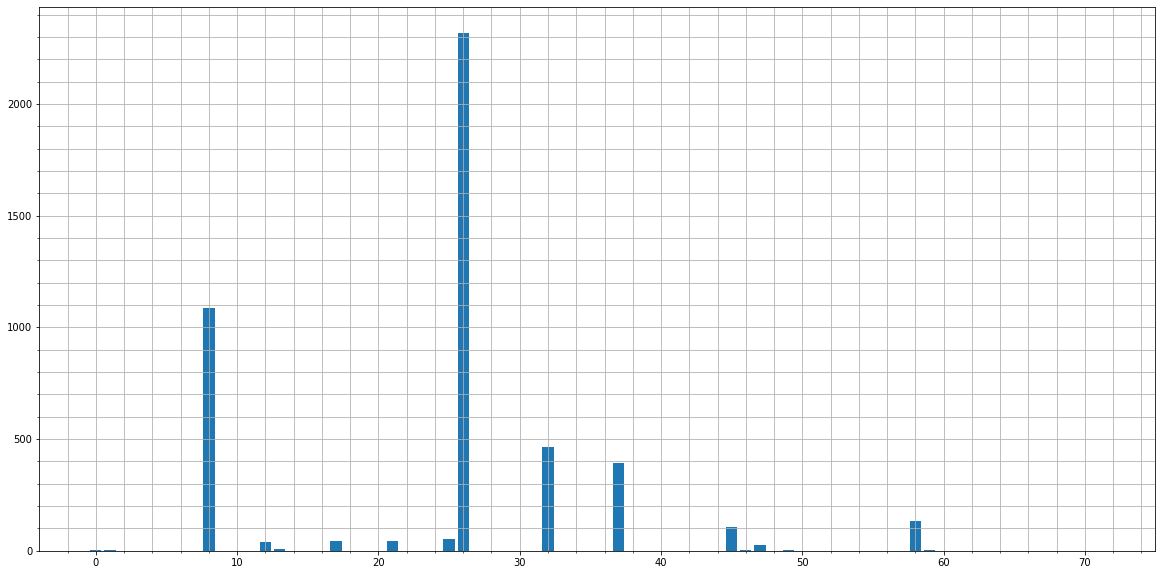

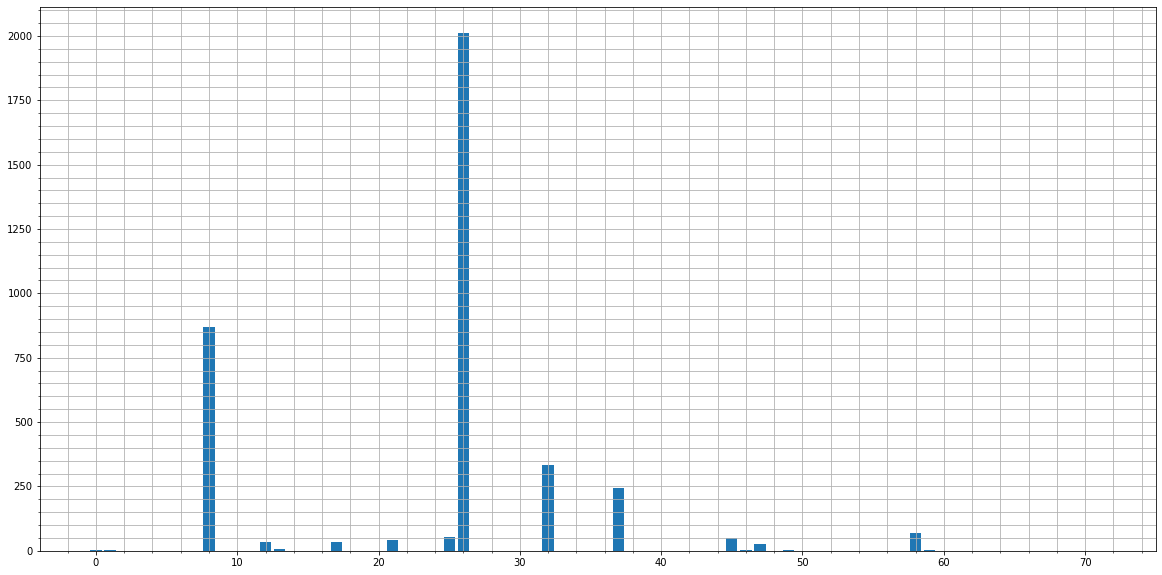

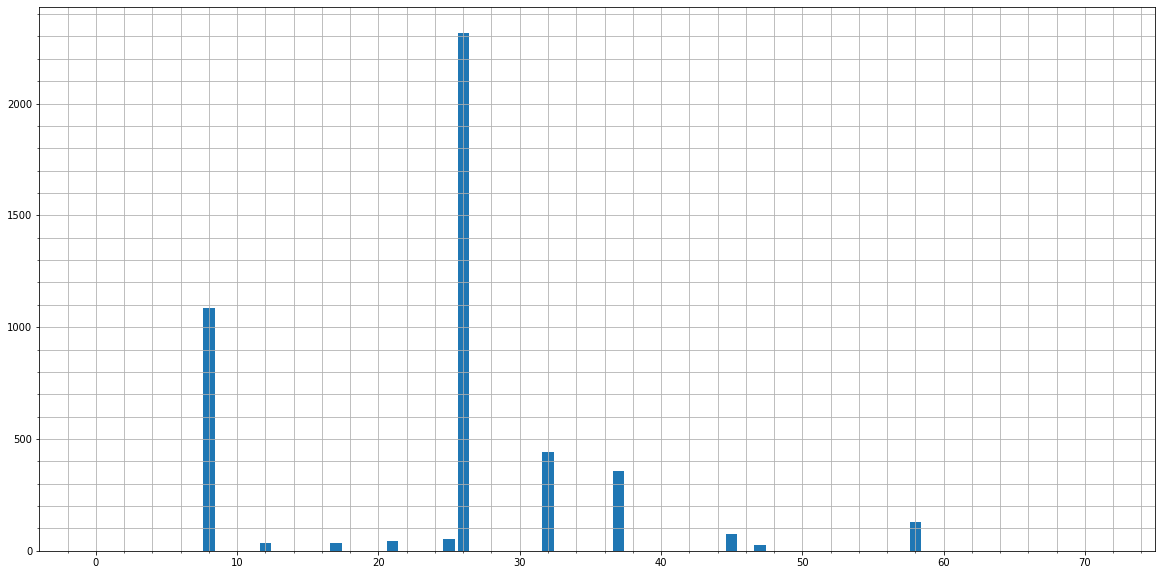

In [51]:
# Вывод данных в заданном диапазоне на диаграмме
plt.figure(figsize=(20, 10))
plt.minorticks_on()
plt.grid(True, which='both')
n_1, n_2 = 0, len(t)
plt.bar(t[n_1:n_2], ds_1[n_1:n_2])
plt.show()

plt.figure(figsize=(20, 10))
plt.minorticks_on()
plt.grid(True, which='both')
plt.bar(t[int(n_1/2):int(n_2/1)], ds_2[int(n_1/2):int(n_2/1)])
plt.show()

plt.figure(figsize=(20, 10))
plt.minorticks_on()
plt.grid(True, which='both')
plt.bar(t[n_1:n_2], ds_3[n_1:n_2])
plt.show()